# Titanic Dataset 생존자 EDA<br>

### Question 0) Name 컬럼이 Survived에 영향을 미칠까?
### Question 1) 생존률이 가장 높은 다변수 예측
### Question 2) 생존률이 가장 낮은 다변수 예측
    - Fare이 높으면 대부분 1등석일까?
    - 1등석이라면 혹은 Fare이 높으면 생존률 또한 높아질까?
    - Sex에 따라 생존률이 달라질까?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
sns.set()

In [2]:
train = pd.read_csv('input/train.csv')
# 데이터셋 주소
# https://www.kaggle.com/c/titanic

In [3]:
# 한글 글꼴 설정
plt.rc('font', family='Malgun Gothic')
# http://doc.mindscale.kr/km/python/11.html
# 에서 참조

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary
- Survived: <br>0 : 죽음, 1: 생존<br><br>
- pclass:<br>fisrt class/ secound class/ third class..  1= 1등석, 2 = 2등석, 3 = 3등석<br><br>
- Name:<br>탑승객 이름<br><br>
- Sex:<br>탑승객 성별<br><br>
- Sibsp:<br>같이 탑승한 가족의 수<br><br>
- Parch:<br># of parents / children aboard the Titanic같이 탑승한 부모/자매의 수<br><br>
- Ticket:<br> 티켓 번호<br><br>
- Fare:<br>티켓 가격<br><br>
- Cabin:<br>선실 번호<br><br>
- Embarked:<br>탑승한 선착장(C = Cherbourg, Q = Queenstown, S = Southampton)<br><br>

### 불필요해 보이는 feature 삭제

1. Ticket은 고유번호로 생존에 영향을 끼치지 않을거라고 판단
2. Cabin(선실 번호)는 다른 이외의 값(Pclass, Fare)을 기준으로 선정되었을거라고 생각하여 삭제

In [5]:
train.drop(['Ticket', 'Cabin'], axis='columns', inplace=True)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [6]:
train.shape

(891, 10)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


### Feature별 NaN 값 조회하기

In [8]:
# feature별 null 값의 개수
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

### feature의 value를 세서, bar chart를 쉽게 구성할 수 있도록 함수 정의

In [9]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

## feature별 특성 파악 및

## feature별 적절한 chart 생성하여 가설 정리

Text(0.5, 1.0, 'Sex별 생존 수')

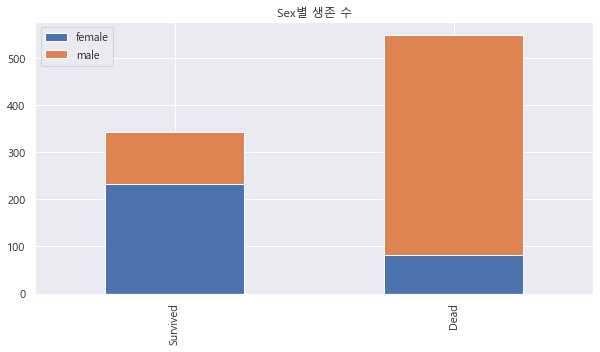

In [10]:
bar_chart('Sex')
plt.title('Sex별 생존 수')
# chart를 보고 세운 가설 1 : 여자(female)이 남자(male)보다 살아남을 확률이 더 높았다.

Text(0.5, 1.0, 'Pclass별 생존 수')

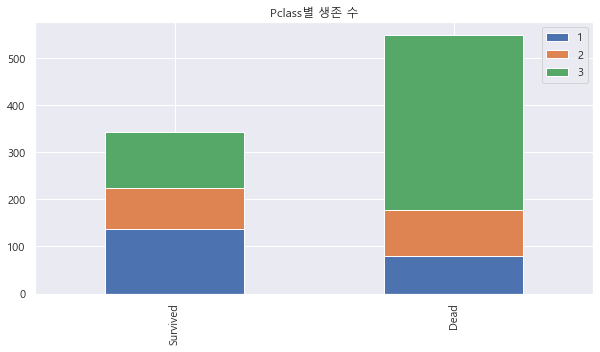

In [11]:
bar_chart('Pclass')
plt.title('Pclass별 생존 수')
# chart를 보고 세운 가설 2 : 1등급 좌석의 사람이 2등급, 3등급보다 살아남을 확률이 더 높았다.

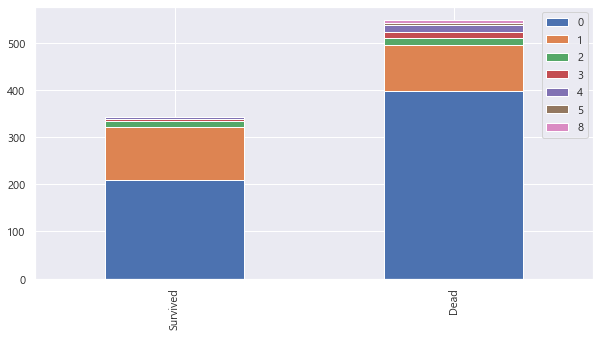

In [12]:
bar_chart('SibSp')
# chart를 보고 세운 가설 3 : 가족없이 혼자 탑승한 사람은 많이 죽었다.

In [13]:
train['Fare'].describe()
# Fare column은 평균(mean) 값이 32.20인 반면에, max 값이 512.32로
# 티켓 가격이 저가와 고가로 심하게 나뉘는걸 확인할 수 있다.

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Text(0.5, 1.0, '탑승객별 Fare')

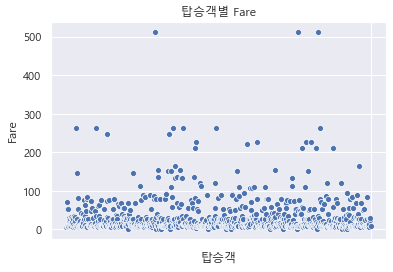

In [14]:
## Fare 분포 확인

sns.scatterplot(x="Name", y="Fare", data=train)
plt.xticks('')
plt.xlabel('탑승객')
plt.title('탑승객별 Fare')

# 대부분 저가의 티켓을 구매한 것을 확인할 수 있다.

Text(0.5, 1.0, 'Fare별 생존 수')

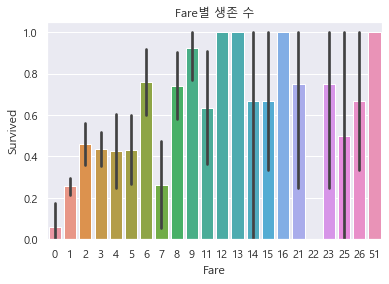

In [15]:
def fare_bins(d, col, factor=2):
    rounding = lambda x: int(np.around(x / factor))
    d[col] = d[col].apply(rounding)
    return d

fares = fare_bins(train, 'Fare', 10)
sns.barplot(x="Fare", y="Survived", data=fares)
plt.title('Fare별 생존 수')
# 전반적으로 Fare이 낮을 수록 (요금을 적게 낼 수록) 생존률이 감소하고,
# 비싼 요금을 냈을 수록 생존률이 증가한다.

Text(0.5, 1.0, '나이 분포도')

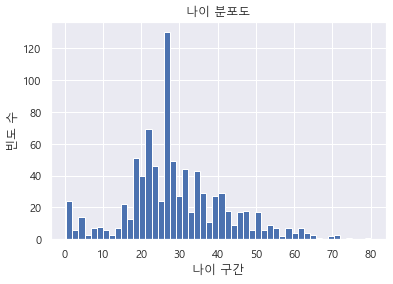

In [16]:
## Age의 결측값을 Pclass와 Sex feature이 같은 instance들의 평균 나이 값으로 메꿈
train["Age"].fillna(train.groupby(["Pclass", "Sex"])["Age"].transform("mean"), inplace = True)

# 나이의 분포도 출력
train["Age"].plot.hist(bins=50)
plt.ylabel('빈도 수')
plt.xlabel('나이 구간')
plt.title('나이 분포도')
# 대부분의 탑승객은 20~40대인 것을 확인.

Text(0.5, 1.0, 'Age별 생존 수')

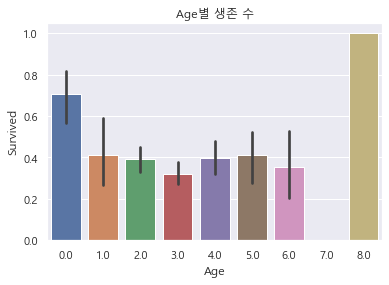

In [17]:
def age_bins(d, col, factor=2):
    rounding = lambda x: np.around(x / factor)
    d[col] = d[col].apply(rounding)
    return d

a = age_bins(train, 'Age', 10)
sns.barplot(x="Age", y="Survived", data=a)
plt.title('Age별 생존 수')
# 나이가 매우 적거나 매우 높을수록 생존률이 높다.
# 양 극단의 나이를 제외하고는 생존률은 랜덤하게 보여진다.

Text(0.5, 1.0, 'Parch별 생존 수')

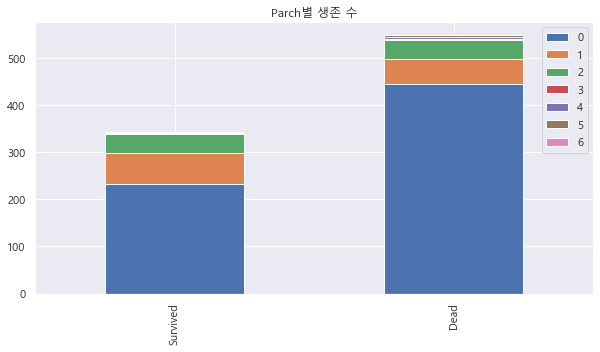

In [18]:
bar_chart('Parch')
plt.title('Parch별 생존 수')
# 아이들, 부모님과 함께 탑승하지 않은 사람은 많이 죽었다.

Text(0.5, 1.0, 'Embarked별 생존 수')

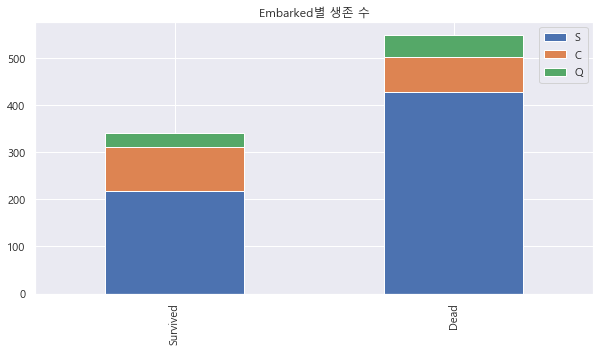

In [19]:
bar_chart('Embarked')
plt.title('Embarked별 생존 수')
# S 선착장에서 탑승한 사람은 많이 죽었다.

Text(0.5, 1.0, '3등석 승객이 지불한 요금')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


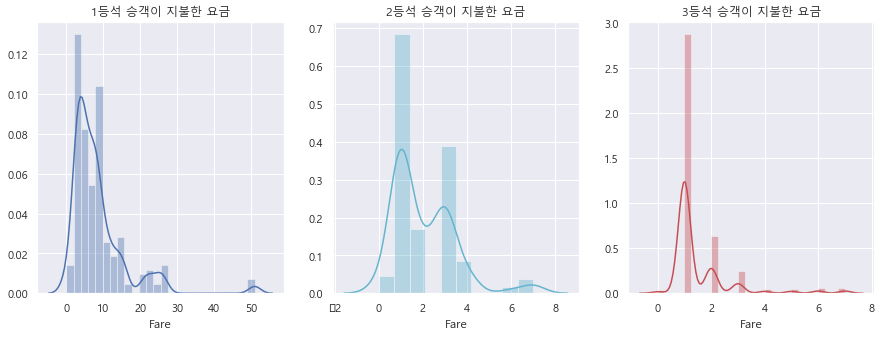

In [20]:
# 고급 class에 탑승한 승객은 높은 Fare를 지불했을 것이다.
# 즉, Pclass가 낮을 수록 Fare의 값이 높을 것이다.
_, ax = plt.subplots(1,3,figsize=(15,5))

sns.distplot(train[train['Pclass']==1]['Fare'], ax=ax[0], color = 'b')
ax[0].set_title('1등석 승객이 지불한 요금')

sns.distplot(train[train['Pclass']==2]['Fare'], ax=ax[1], color = 'c')
ax[1].set_title('2등석 승객이 지불한 요금')

sns.distplot(train[train['Pclass']==3]['Fare'], ax=ax[2], color = 'r')
ax[2].set_title('3등석 승객이 지불한 요금')

# 1등석(1st), 2등석(2rd), 3등(3rd)석 순으로 요금(Fare)을 많이 지불했음을 알 수 있다.

### 'Name' feaure을 이용하여, 새로운 feature 생성하기
- Mrs, Miss 등 여성을 나타내는 이름이 있다.
- 이름에 일부분을 통하여, 해당 사람의 신분을 알아낼 수 있다. (Master, Rare 등등)
- Idea : 위의 둘을 통하여, 새로운 feature을 생성하면, 정보를 더 획득할 수 있을 것 같다.

In [21]:
# Name feature에서 성별 및 신분을 나타내는 부분을 정규표현식으로 추출하여 종류 확인
train.Name.str.extract('([A-Za-z]+)\.', expand=False).value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Don           1
Mme           1
Lady          1
Countess      1
Sir           1
Capt          1
Jonkheer      1
Ms            1
Name: Name, dtype: int64

In [22]:
# 성별 및 신분을 나타내는 부분을 정규표현식으로 추출하여 status라는 새로운 feature 생성
train['Status'] = train.Name.str.extract('([A-Za-z]+)\.', expand=False)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,1,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,4.0,1,0,7,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,1,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,4.0,1,0,5,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,4.0,0,0,1,S,Mr


- Mr, - 성인 남자

- Ms, - 성인 여자

- Mrs, - 기혼 여성 ( Ms 라고 해도 큰 상관없음)

- Miss, - 12세 미만 여자 아이

- Mater - 결혼하지 않은 남성(청소년 이하)

###  모든 Status의 instance를 Master와 Ms, Mr, Master, Sparce로 분리

- Lady, Mlle, Ms, MMe는 Ms로 통합
- 다소 횟수가 적은 이름은 Saprce로 통합

<br><br>

#### 따라서, Status의 모든 feature value는 Master, Miss, Sparce 중 한 가지로 표현

In [23]:
train['Status'] = train['Status'].replace(
    ['Countess','Capt', 'Col', 'Don','Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
    , 'Sparce')
train['Status'] = train['Status'].replace(
    ['Mlle', 'Ms', 'Lady', 'Mme', 'Mrs'], 'Ms')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,1,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,4.0,1,0,7,C,Ms
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,1,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,4.0,1,0,5,S,Ms
4,5,0,3,"Allen, Mr. William Henry",male,4.0,0,0,1,S,Mr


Text(0.5, 1.0, '새로만든 Feature에 따른 생존률 분석')

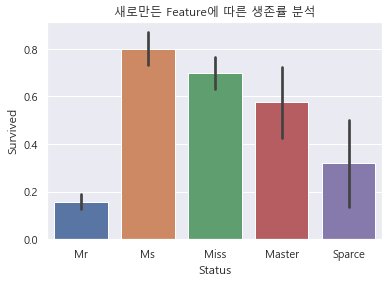

In [24]:
sns.barplot(x='Status', y="Survived", data=train)
plt.title('새로만든 Feature에 따른 생존률 분석')

### 2변수 탐색

#### 1) 2변수 탐색 -1.
- Idea : 위에서 얻은 가설을 통계로, <br> 
1) 여성이면서, 1등석에 탑승한 사람은 대부분 생존했을 것이다.<br>
2) 남성이면서, 3등석에 탑승한 사람은 대부분 죽었을 것이다.

Text(0.5, 1.0, '3등석 female 생존률')

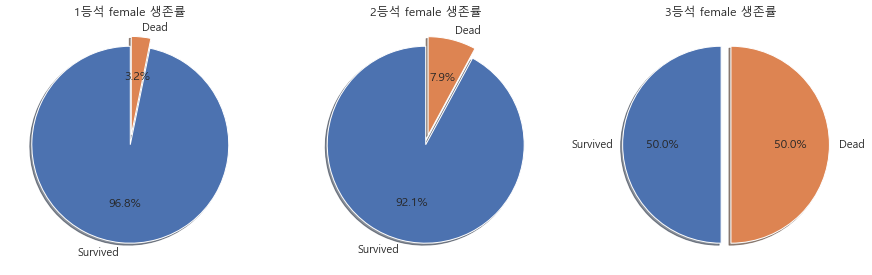

In [25]:
# Plass별 female 생존률 분석

labels = 'Survived', 'Dead'
Woman_1st = [len(train.loc[(train["Pclass"]==1) & (train["Sex"]=='female') & (train["Survived"]==1)]), \
         len(train.loc[(train["Pclass"]==1) & (train["Sex"]=='female') & (train["Survived"]==0)]) ]

Woman_2st = [len(train.loc[(train["Pclass"]==2) & (train["Sex"]=='female') & (train["Survived"]==1)]), \
         len(train.loc[(train["Pclass"]==2) & (train["Sex"]=='female') & (train["Survived"]==0)]) ]

Woman_3st = [len(train.loc[(train["Pclass"]==3) & (train["Sex"]=='female') & (train["Survived"]==1)]), \
         len(train.loc[(train["Pclass"]==3) & (train["Sex"]=='female') & (train["Survived"]==0)]) ]

explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig = plt.figure()
fig.set_size_inches(15,5)
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.pie(Woman_1st, shadow=True, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('1등석 female 생존률')  

ax2.pie(Woman_2st, shadow=True, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.set_title('2등석 female 생존률') 

ax3.pie(Woman_3st, shadow=True, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax3.set_title('3등석 female 생존률')

# 다음과 같이 1등석(Pclass = 1st)인 여성의 생존률이 가장 높고,
# 2등석(Pclss = 2st)인 여성의 생존률이 다음으로 높음을 알 수 있다.

Text(0.5, 1.0, '3등석 male 생존률')

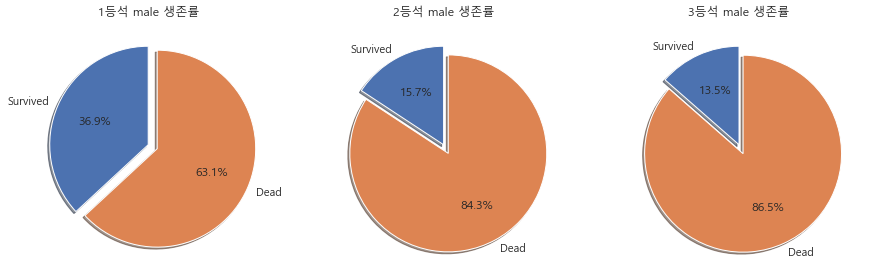

In [26]:
# Plass별 male 생존률 분석

labels = 'Survived', 'Dead'
Man_1st = [len(train.loc[(train["Pclass"]==1) & (train["Sex"]=='male') & (train["Survived"]==1)]), \
         len(train.loc[(train["Pclass"]==1) & (train["Sex"]=='male') & (train["Survived"]==0)]) ]

Man_2st = [len(train.loc[(train["Pclass"]==2) & (train["Sex"]=='male') & (train["Survived"]==1)]), \
         len(train.loc[(train["Pclass"]==2) & (train["Sex"]=='male') & (train["Survived"]==0)]) ]

Man_3st = [len(train.loc[(train["Pclass"]==3) & (train["Sex"]=='male') & (train["Survived"]==1)]), \
         len(train.loc[(train["Pclass"]==3) & (train["Sex"]=='male') & (train["Survived"]==0)]) ]

explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig = plt.figure()
fig.set_size_inches(15,5)
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.pie(Man_1st, shadow=True, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('1등석 male 생존률')  

ax2.pie(Man_2st, shadow=True, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.set_title('2등석 male 생존률') 

ax3.pie(Man_3st, shadow=True, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax3.set_title('3등석 male 생존률')

# 다음과 같이 3등석(Pclass = 3)인 남성의 생존률이 가장 낮음을 알 수 있다.

#### 1) 2변수 탐색-2.
- Idea : 위에서 얻은 가설을 통계로, <br> 
1) 여성이면서, 자식과 동반한 탑승객은 대부분 생존했을 것이다.<br>
2) 남성이면서, 자식과 동반하지 않은 탑승객은 대부분 사망했을 것이다.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


Text(0.5, 1, 'feature 상관관계')

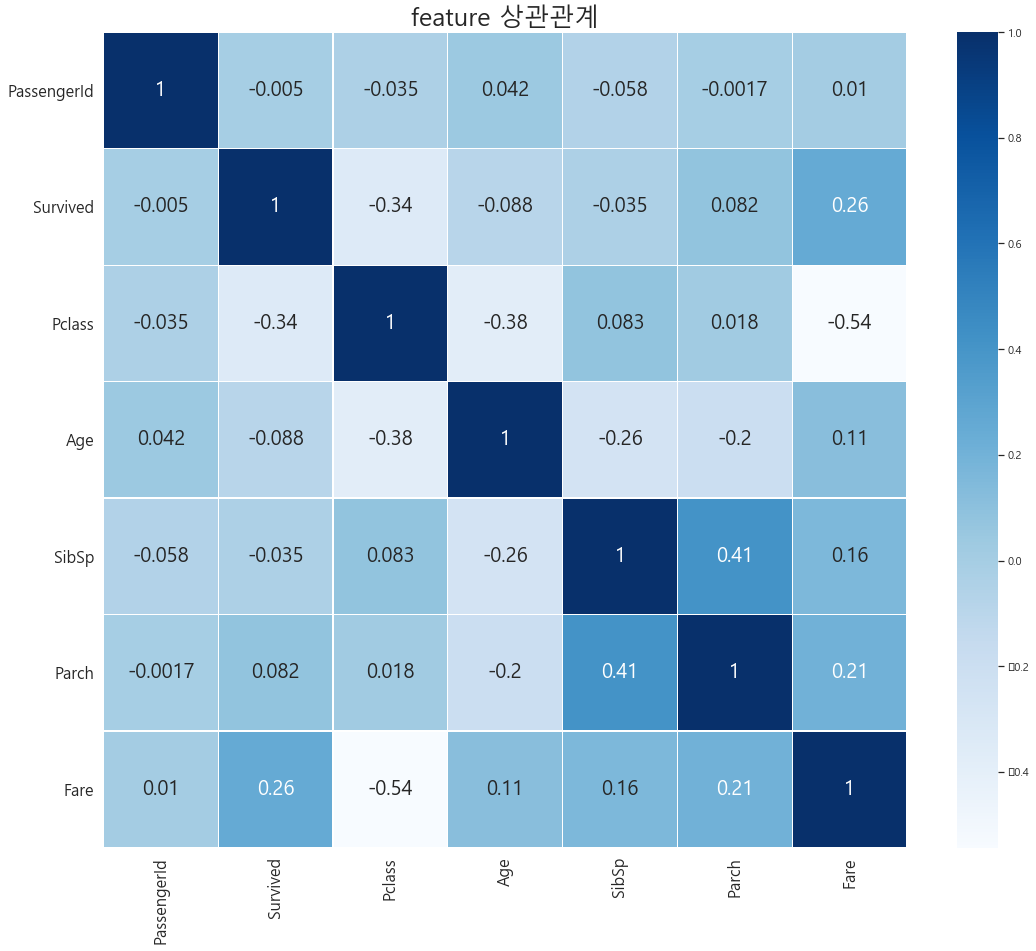

In [27]:
sns.heatmap(train.corr(), annot=True, linewidths=0.2, 
            annot_kws={'size':20}, cmap='Blues')
# 교수님의 조언대로, cmap='RdYlGn' 에서 cmap='Blues'로 변경
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('feature 상관관계', fontsize=25)

Text(0.5, 1.0, '자식(sibling)과 동반하지 않은 남성(female)의 생존 분석')

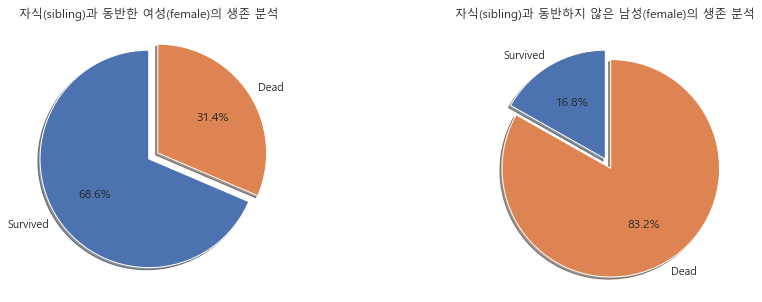

In [28]:
# 자식과 동반한 여성의 생존률 분석, 동반하지 않은 남성의 생존률 분석 

labels = 'Survived', 'Dead'
Woman_Sib = [len(train.loc[(train["SibSp"]>0) & (train["Sex"]=='female') & (train["Survived"]==1)]), \
         len(train.loc[(train["SibSp"]>0) & (train["Sex"]=='female') & (train["Survived"]==0)]) ]

Man_Sib = [len(train.loc[(train["SibSp"]==0) & (train["Sex"]=='male') & (train["Survived"]==1)]), \
         len(train.loc[(train["SibSp"]==0) & (train["Sex"]=='male') & (train["Survived"]==0)]) ]

explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig = plt.figure()
fig.set_size_inches(15,5)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.pie(Woman_Sib, shadow=True, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('자식(sibling)과 동반한 여성(female)의 생존 분석')  

ax2.pie(Man_Sib, shadow=True, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.set_title('자식(sibling)과 동반하지 않은 남성(female)의 생존 분석')  

# 다음과 같이, 자식을 동반한 여성은 
# 자식을 동반하지 않은 남성에 비해 비교적 많이 생존했음을 볼 수 있다.

## 최종 다변수 분석 & Result

- 여태까지 예측한 가설을 토대로 모은 변수를 종합한 탑승객의 생존률 분석
- 생존률이 가장 높은 Case와 가장 낮은 Case 탐색

### 위의 가설을 토대로, 다음과 같은 결론을 위한 새로운 가설을 세웠다.

#### 생존률이 가장 높은 남성에 대한 가설(분석)
- Master(12세 이하 남성)이며, 1등석에 탑승하였고, 가족과 함께 동반한 남자의 생존률이 비교적 높을 것이다.

<br>

#### 생존률이 가장 낮은 남성에 대한 가설(분석)
- Mr(성인 남성)이며, 3등석에 탑승하였고, 가족이나 자식 없이 동반한 남자의 생존률이 비교적 낮을 것이다.

Text(0.5, 1.0, '생존률이 가장 낮을 것으로 추측되는\n남성의 생존률 분석')

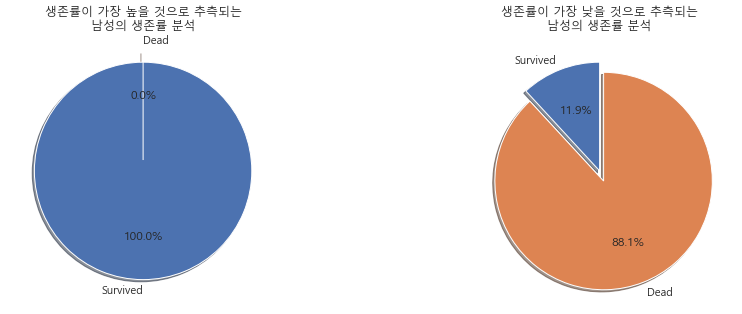

In [29]:
# Master(12세 이하 남성)이며, 1등석에 속하고, 
# 가족과 함께 동반한 남자의 생존률 분석
labels = 'Survived', 'Dead'
Man_top =  [len(train.loc[ (train["Parch"]>0) & (train["Sex"]=='male') & 
                           (train["Status"]=='Master') & (train["Pclass"] == 1) &
                           (train["Survived"]==1)]),
         len(train.loc[ (train["Parch"]>0) & (train["Sex"]=='male') & 
                       (train["Status"]=='Master')  & (train["Pclass"] == 1) &
                       (train["Survived"]==0)]) ]

# Mr(성인 남성)이며, 3등석에 속하고, 
# 가족과 함께 동반하지 않은 남자의 생존률 분석
Man_bottom = [len(train.loc[(train["Parch"]==0) & (train["Sex"]=='male') & 
                        (train["Status"]=='Mr')  & (train["Pclass"] == 3) &
                        (train["Survived"]==1)]),
         len(train.loc[(train["Parch"]==0) & (train["Sex"]=='male') &
                       (train["Status"]=='Mr')  & (train["Pclass"] == 3) &
                       (train["Survived"]==0)]) ]

explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig = plt.figure()
fig.set_size_inches(15,5)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.pie(Man_top, shadow=True, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('생존률이 가장 높을 것으로 추측되는\n남성의 생존률 분석')  

ax2.pie(Man_bottom, shadow=True, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.set_title('생존률이 가장 낮을 것으로 추측되는\n남성의 생존률 분석')  

# 다음과 같이, 

# Master(12세 이하 남성)이며, 1등석에 속하고 
# 가족과 함께 동반한 탑승객은 전원 생존한 것을 볼 수 있고,

# Mr(성인 남성)이며, 3등석에 속하고 
# 가족과 함께 동반하지 않은 탑승객의 약 90%는 사망한 것을 볼 수 있다.

#### 생존률이 가장 높은 여성에 대한 가설(분석)
- Ms로 분류된 여성이며, 1등석에 탑승하였고, 가족과 함께 동반한 여자의 생존률이 비교적 높을 것이다.

<br>

#### 생존률이 가장 낮은 여성에 대한 가설(분석)
- Miss로 분류된 여성이며, 3등석에 탑승하였고, 가족이나 자식 없이 동반한 여성의 생존률이 비교적 낮을 것이다.

Text(0.5, 1.0, '생존률이 가장 낮을 것으로 추측되는\n여성의 생존률 분석')

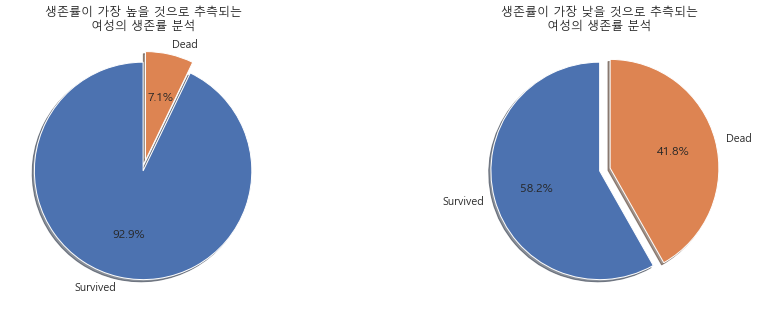

In [30]:
labels = 'Survived', 'Dead'

# Miss(성인 여성)이며, 1등석에 속하고, 
# 가족과 함께 동반한 여성의 생존률 분석
Woman_top =  [len(train.loc[ (train["Parch"]>0) & (train["Sex"]=='female') & 
                           (train["Status"]=='Ms') & (train["Pclass"] == 1) &
                           (train["Survived"]==1)]),
         len(train.loc[ (train["Parch"]>0) & (train["Sex"]=='female') & 
                        (train["Status"]=='Ms') & (train["Pclass"] == 1) &
                       (train["Survived"]==0)]) ]

# Ms(청소년 여성)이며, 3등석에 속하고, 
# 가족과 함께 동반하지 않은 여성의 생존률 분석
Woman_bottom = [len(train.loc[(train["Parch"]==0) & (train["Sex"]=='female') & 
                        (train["Status"]=='Miss') & (train["Pclass"] == 3) &
                        (train["Survived"]==1)]),
         len(train.loc[(train["Parch"]==0) & (train["Sex"]=='female') &
                       (train["Status"]=='Miss') & (train["Pclass"] == 3) &
                       (train["Survived"]==0)]) ]

explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig = plt.figure()
fig.set_size_inches(15,5)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.pie(Woman_top, shadow=True, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('생존률이 가장 높을 것으로 추측되는\n여성의 생존률 분석')  

ax2.pie(Woman_bottom, shadow=True, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.set_title('생존률이 가장 낮을 것으로 추측되는\n여성의 생존률 분석')  

# 다음과 같이, 

# Ms(성인 여성)이며, 1등석에 속하고, 
# 가족과 함께 동반한 탑승객은 93% 생존한 것을 볼 수 있고,

# Miss(청소년 여성)이며, 3등석에 속하고 
# 가족과 함께 동반하지 않은 탑승객의 약 58%는 사망한 것을 볼 수 있다.

### Results about features <br>

    
- 남성의 경우, 1등석 가족과 탑승한 Master 남성 100%가 생존했으며, 3등석 Mr 남성의 경우 11%만이 생존하였다.
<br><br>
- 여성의 경우, 1등석 가족과 탑승한 Ms 여성 93%가 생존했으며, 3등석 Miss 여성의 경우 58%만이 생존하였다. <br>


1) Sex : 
    - 성별에 따른 생존률 차이 (여성 > 남성)

2) Pclass : 
    - 높은 등급일 수록 생존률이 높아짐

3) Name :
    - 여성의 경우, 청소년보다 성인 여성의 생존률이 높음
    - 남성의 경우, 청소년 남성이 성인 남성보다 생존률이 높음
4) Age : (최종 분석에 다변수 분석으로 추가하여 분석하진 않았지만)
    - 나이가 매우 낮으면, 생존률이 높음


#### 사용한 시각화 툴
1) boxplot <br>
2) hist<br>
3) scatterplot<br>
4) heatmap<br>
5) pie<br>
6) dist<br>

## References

- https://www.kaggle.com/c/titanic
- [Mukesh ChapagainTitanic Solution: A Beginner's Guide](https://www.kaggle.com/chapagain/titanic-solution-a-beginner-s-guide?scriptVersionId=1473689)
- https://datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/
- https://romanegloo.wordpress.com/tag/mr-ms-mrs-miss-mstr-%ED%98%B8%EC%B9%AD/
- https://github.com/minsuk-heo/kaggle-titanic
- https://3months.tistory.com/325
- https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python
- https://m.blog.naver.com/PostView.nhn?blogId=aqua8786&logNo=90119221693&proxyReferer=https:%2F%2Fwww.google.com%2F
- http://doc.mindscale.kr/km/python/11.html


In [31]:
train.to_csv('result.csv')